In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importo i dati
file = pd.read_excel(r'/content/drive/MyDrive/IOcompletion_tesi_agnese_daffara/Dataset/IMPLICIT_results_lemmatized.xlsx')

#creo una variabile con i nomi dei modelli
models = ["GS", "BERT-multi", "BERT-it", "UmBERTo", "BERTino", "ELECTRA"]

#importo i punteggi di similarity
scores = (file['sim_med0'][:600], file['sim_med1'][:600], file['sim_med2'][:600], file['sim_med3'][:600], file['sim_med4'][:600], file['sim_med5'][:600])

      modello  similarity
0          GS    0.735083
2     BERT-it    0.464483
3     UmBERTo    0.443467
5     ELECTRA    0.433583
4     BERTino    0.406283
1  BERT-multi    0.318950


<ipython-input-3-bc6cf15da266>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='modello', y='similarity', data=df, palette='viridis', linewidth=0.2, ci=None)
<ipython-input-3-bc6cf15da266>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='modello', y='similarity', data=df, palette='viridis', linewidth=0.2, ci=None)


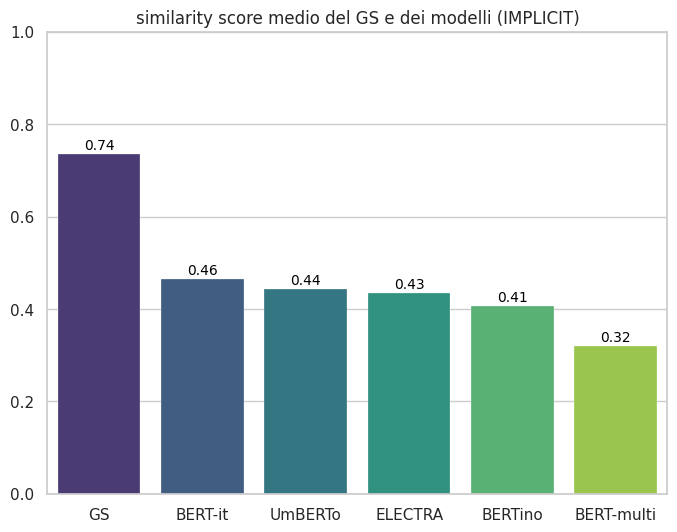

In [3]:
#visualizzo le medie totali di similarity per ogni modello
scores_mean = []
for score in scores:
  scores_mean.append(np.mean(score))

#creo il dataframe con i modelli e i rispettivi similarity scores totali
df = pd.DataFrame({'modello': models, 'similarity': scores_mean})
df = df.sort_values(by='similarity', ascending=False)
print(df)

#creo il grafico a barre con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='modello', y='similarity', data=df, palette='viridis', linewidth=0.2, ci=None)
for index, value in enumerate(df['similarity']):
    barplot.text(index, value + 0.01, round(value, 2), ha='center', color='black', fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title("similarity score medio del GS e dei modelli (IMPLICIT)")
plt.ylim(0, 1)
plt.show()

In [4]:
import scipy.stats as stats
from scipy.stats import iqr

#calcolo una statistica descrittiva completa per ogni modello

#creo il dizionario per il nome del modello e tutte le statistiche
results = {}
#faccio le misurazioni statistiche che mi interessano per ogni modello
for model, score in zip(models, scores):
    results[model] = {
        'Moda': stats.mode(score),
        'Mediana': np.median(score),
        'Media': np.mean(score),
        'Deviazione Standard': np.std(score),
        'Minimo': np.min(score),
        'Massimo': np.max(score),
        'Campo di Variazione': np.max(score) - np.min(score),
        'Scarto Interquartile': iqr(score),
        'Scarto Medio Assoluto': np.median(np.abs(score - np.median(score))),
        'Varianza': np.var(score),
        'Scarto Quadratico Medio': np.std(score),
        'Coefficiente di Variazione': (np.std(score) / np.mean(score)) * 100,
        'Deviazione Mediana Assoluta': np.median(np.abs(score - np.median(score))),
        'Q1': np.percentile(score, 25),
        'Q3': np.percentile(score, 75)
    }

#stampo i risultati
for key, value in results.items():
    print(f"\nResults for {key}:")
    for measure, result in value.items():
        print(f"{measure}: {result}")


Results for GS:
Moda: ModeResult(mode=1.0, count=321)
Mediana: 1.0
Media: 0.7350833333333333
Deviazione Standard: 0.31711353338442616
Minimo: -0.06
Massimo: 1.0
Campo di Variazione: 1.06
Scarto Interquartile: 0.53
Scarto Medio Assoluto: 0.0
Varianza: 0.10056099305555556
Scarto Quadratico Medio: 0.31711353338442616
Coefficiente di Variazione: 43.139807285037
Deviazione Mediana Assoluta: 0.0
Q1: 0.47
Q3: 1.0

Results for BERT-multi:
Moda: ModeResult(mode=1.0, count=45)
Mediana: 0.27
Media: 0.31895
Deviazione Standard: 0.2805798712785125
Minimo: -0.23
Massimo: 1.0
Campo di Variazione: 1.23
Scarto Interquartile: 0.33
Scarto Medio Assoluto: 0.16
Varianza: 0.07872506416666666
Scarto Quadratico Medio: 0.2805798712785125
Coefficiente di Variazione: 87.96986088054946
Deviazione Mediana Assoluta: 0.16
Q1: 0.12
Q3: 0.45

Results for BERT-it:
Moda: ModeResult(mode=1.0, count=89)
Mediana: 0.4
Media: 0.4644833333333333
Deviazione Standard: 0.30421549334129727
Minimo: -0.1
Massimo: 1.0
Campo di Vari

In [5]:
from sklearn.metrics import precision_recall_fscore_support

#calcolo precision, recall e fscore dei modelli

#prima di eseguire rimuovo dai modelli il GS
models = ('BERT-multi', 'BERT-italian-xxl', 'UmBERTo', 'BERTino', 'ELECTRA-italian')
#creo una variabile con gli output di ogni modello
outputs = [file['BERT-multi'][:600], file['BERT-italian-xxl'][:600], file['UmBERTo'][:600], file['BERTino'][:600], file['ELECTRA-italian'][:600]]
#creo le variabili con gli output GS
predicted1 = file['obj_1'][:600]
predicted2 = file['obj_2'][:600]

#definisco la funzione per calcolare le metriche classiche
def prec(output):
  stat1 = precision_recall_fscore_support(output, predicted1, average= "weighted")
  stat2 = precision_recall_fscore_support(output, predicted2, average= "weighted")
  return stat1, stat2

count = 0
for output in outputs:
  count = count + 1
  stat = prec(output)
  print('\nmodello', count)
  for item in stat:
    print('precision:', round(item[0],2))
    print('recall:', round(item[1],2))
    print('f-measure:', round(item[2],2))


modello 1
precision: 0.1
recall: 0.09
f-measure: 0.07
precision: 0.1
recall: 0.1
f-measure: 0.08

modello 2
precision: 0.2
recall: 0.2
f-measure: 0.17
precision: 0.19
recall: 0.19
f-measure: 0.16

modello 3
precision: 0.15
recall: 0.16
f-measure: 0.13
precision: 0.14
recall: 0.15
f-measure: 0.12

modello 4
precision: 0.12
recall: 0.14
f-measure: 0.1
precision: 0.1
recall: 0.13
f-measure: 0.1

modello 5
precision: 0.19
recall: 0.17
f-measure: 0.14
precision: 0.16
recall: 0.15
f-measure: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<ipython-input-6-1c86c4b7977f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Punteggi', y='Verbo', data=media_per_verbo, palette='viridis', order=media_per_verbo['Verbo'])


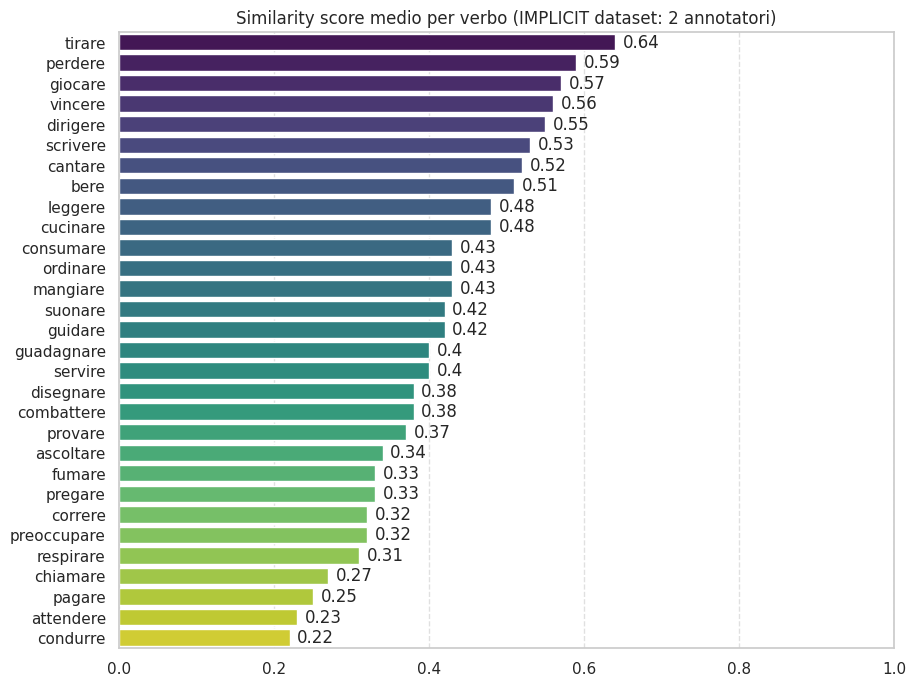

In [6]:
#calcolo quali verbi hanno ottenuto una similarity più alta e creo un grafico

#creo una variabile con i 30 verbi e una con i punteggi medi su ogni frase
verbi = ['ascoltare', 'attendere', 'bere', 'cantare', 'chiamare', 'combattere', 'condurre', 'consumare', 'correre', 'cucinare', 'dirigere', 'disegnare', 'fumare', 'giocare', 'guadagnare', 'guidare', 'leggere', 'mangiare', 'ordinare', 'pagare', 'perdere', 'pregare', 'preoccupare', 'provare', 'respirare', 'scrivere', 'servire', 'suonare', 'tirare', 'vincere']
score = file['medie_tot'][:600]

#creo una funzione che divide ogni lista in gruppi da 20 scores ciascuno, ogni gruppo si riferisce ad un verbo
def verb_values(score):
  gruppi = [score[i:i+20] for i in range(0, len(score), 20)]
  lista = list(zip(verbi, gruppi))
  return lista

#applico la funzione ai punteggi medi
sis = verb_values(score)

#creo il dataframe che associa ogni verbo alla lista di punteggi
df = pd.DataFrame(sis, columns=['Verbo', 'Punteggi'])
df = df.explode('Punteggi')
#tratto i punteggi come float
df['Punteggi'] = df['Punteggi'].astype(float)
#faccio la media totale per ogni verbo
media_per_verbo = df.groupby('Verbo')['Punteggi'].mean().reset_index()
#arrotondo a due decimali ogni media
media_per_verbo['Punteggi'] = media_per_verbo['Punteggi'].round(2)
#print(media_per_verbo)
#ordino per punteggio
media_per_verbo = media_per_verbo.sort_values(by='Punteggi', ascending=False)

#creo il grafico
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
plot = sns.barplot(x='Punteggi', y='Verbo', data=media_per_verbo, palette='viridis', order=media_per_verbo['Verbo'])
for i, score in enumerate(media_per_verbo['Punteggi']):
    rounded_score = round(score, 2)
    plot.text(score + 0.01, i, f'{rounded_score}', va='center')
plt.title('Similarity score medio per verbo (IMPLICIT dataset: 2 annotatori)')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, 1)
plt.show()

<ipython-input-7-963d3c81faa9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Punteggi', y='Verbo', data=media_per_verbo, palette='viridis', order=media_per_verbo['Verbo'])


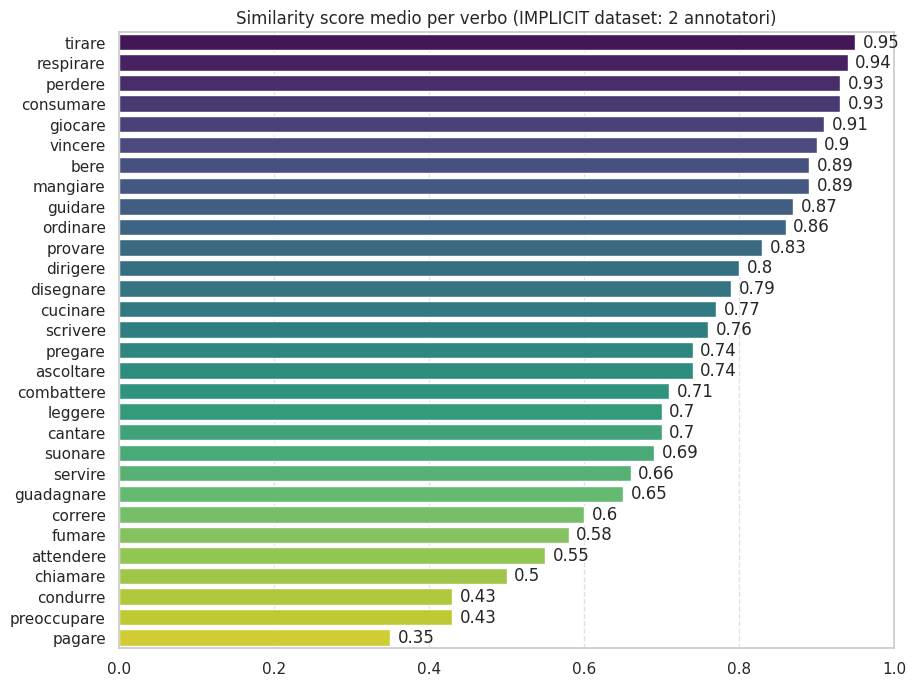

In [7]:
#calcolo le medie per verbo sull'annotazione manuale
score = file['sim_med0'][:600]

#divido i punteggi in gruppi da 20 con la funzione definita sopra
sis = verb_values(score)
#creo il dataframe
df = pd.DataFrame(sis, columns=['Verbo', 'Punteggi'])
df = df.explode('Punteggi')
#tratto i punteggi come float
df['Punteggi'] = df['Punteggi'].astype(float)
#calcolo la media per ogni verbo e arrotondo a due decimali
media_per_verbo = df.groupby('Verbo')['Punteggi'].mean().reset_index()
media_per_verbo['Punteggi'] = media_per_verbo['Punteggi'].round(2)
#ordino per punteggio
media_per_verbo = media_per_verbo.sort_values(by='Punteggi', ascending=False)

#creo il grafico
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
plot = sns.barplot(x='Punteggi', y='Verbo', data=media_per_verbo, palette='viridis', order=media_per_verbo['Verbo'])
for i, score in enumerate(media_per_verbo['Punteggi']):
    rounded_score = round(score, 2)
    plot.text(score + 0.01, i, f'{rounded_score}', va='center')
plt.title('Similarity score medio per verbo (IMPLICIT dataset: 2 annotatori)')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, 1)
plt.show()

Da qui in poi si usa per calcolare la correlazione tra le varie features dei verbi (tipo azionale, classe semantica) e la similarity.

In [8]:
from scipy.stats import pearsonr

#carico l'ontologia con le features dei verbi e i punteggi medi ottenuti
df = pd.read_excel('/content/drive/MyDrive/IOcompletion_tesi_agnese_daffara/Dataset/Ontologia_pattern/IO_clean.xlsx')

In [23]:
#calcolo la correlazione tra tipo di Defaulting e punteggio di similarity

var1 = df["LD"]
var2 = df["Similarity_imp"]

corr_coef, p_value = stats.pearsonr(var1, var2)
print("Coefficienti di correlazione di Pearson:", corr_coef)
print("P-value associati:", p_value)

Coefficienti di correlazione di Pearson: 0.28650742952183605
P-value associati: 0.12479159222643661


In [20]:
#calcolo la correlazione tra range di Oggetti e punteggio di similarity

var1 = df["Range"]
var2 = df["Similarity_imp"]

corr_coef, p_value = stats.pearsonr(var1, var2)
print("Coefficienti di correlazione di Pearson:", corr_coef)
print("P-value associati:", p_value)

Coefficienti di correlazione di Pearson: -0.5926922665956655
P-value associati: 0.0005581369560785286


In [16]:
#calcolo la correlazione tra tipo di Defaulting e range di Oggetti

var1 = df["PD"]
var2 = df["Range"]

corr_coef, p_value = stats.pearsonr(var1, var2)
print("Coefficienti di correlazione di Pearson:", corr_coef)
print("P-value associati:", p_value)

Coefficienti di correlazione di Pearson: 0.6287500475631085
P-value associati: 0.0001982995186486977


In [12]:
from scipy.stats import f_oneway

#test oneway ANOVA per verificare l'effetto delle classi verbali sulla similarity
result_tipo = f_oneway(*[df['Similarity_imp'][df['Tipo_azionale'] == feature] for feature in df['Tipo_azionale'].unique()])
print('Influenza del tipo azionale')
print("ANOVA F-statistic:", result_tipo.statistic)
print("ANOVA p-value:", result_tipo.pvalue)

result_tipo_exp = f_oneway(*[df['Similarity_exp'][df['Tipo_azionale'] == feature] for feature in df['Tipo_azionale'].unique()])
print('\nInfluenza del tipo azionale (exp)')
print("ANOVA F-statistic:", result_tipo_exp.statistic)
print("ANOVA p-value:", result_tipo_exp.pvalue)

result_classe = f_oneway(*[df['Similarity_imp'][df['Classe_semantica'] == feature] for feature in df['Classe_semantica'].unique()])
print('\nInfluenza della classe semantica')
print("ANOVA F-statistic:", result_classe.statistic)
print("ANOVA p-value:", result_classe.pvalue)

result_classe_exp = f_oneway(*[df['Similarity_exp'][df['Classe_semantica'] == feature] for feature in df['Classe_semantica'].unique()])
print('\nInfluenza della classe semantica (exp)')
print("ANOVA F-statistic:", result_classe_exp.statistic)
print("ANOVA p-value:", result_classe_exp.pvalue)

Influenza del tipo azionale
ANOVA F-statistic: 1.3554047501174205
ANOVA p-value: 0.27828623536439195

Influenza del tipo azionale (exp)
ANOVA F-statistic: 0.6617772653126692
ANOVA p-value: 0.583023105350326

Influenza della classe semantica
ANOVA F-statistic: 2.9149536014985133
ANOVA p-value: 0.022734638475659565

Influenza della classe semantica (exp)
ANOVA F-statistic: 2.23051632038381
ANOVA p-value: 0.06520068919637152


Tabella ANOVA:
                    sum_sq    df         F    PR(>F)
Classe_semantica  0.254177  13.0  2.914954  0.022735
Residual          0.107320  16.0       NaN       NaN

Risultati del test di Tukey:
                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                               group2                meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------------------------------
                         Learn Verbs                          Psych-Verbs   -0.195 0.7785 -0.5865 0.1965  False
                         Learn Verbs             Verbs Involving the Body    -0.16 0.9237 -0.5515 0.2315  False
                         Learn Verbs        Verbs of Change of Possession   -0.004    1.0 -0.3541 0.3461  False
                         Learn Verbs               Verbs of Communication    -0.21 0.8421  -0.662  0.242  False
            

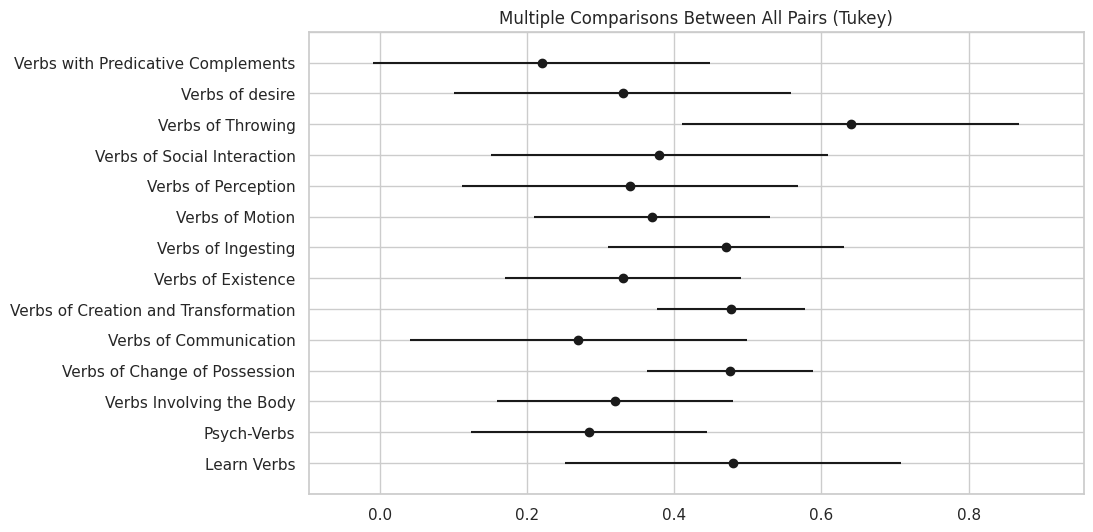

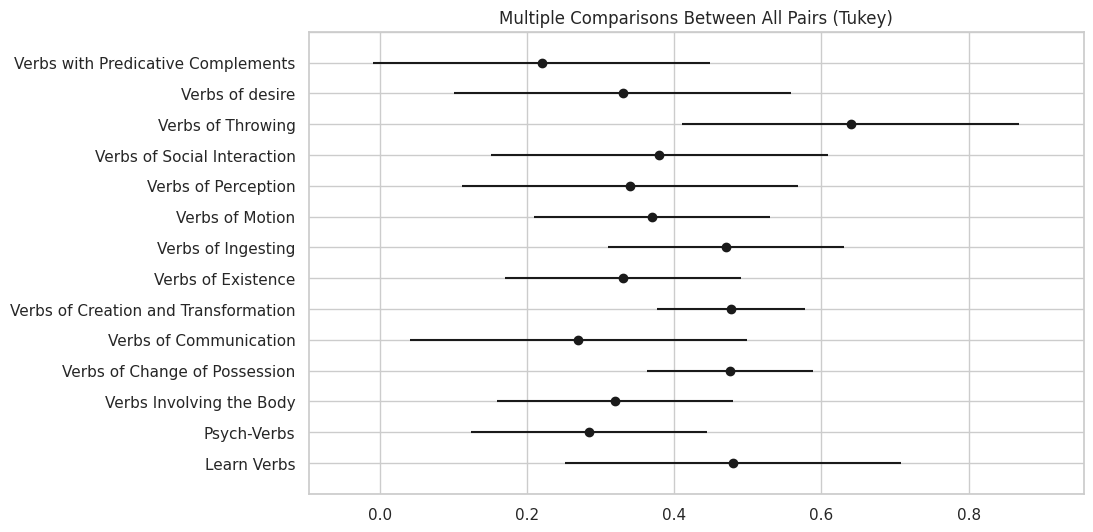

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

#faccio il test di Tukey per vedere la differenza tra classi semantiche

#stampo la tabella ANOVA
anova_model = sm.formula.ols('Similarity_imp ~ Classe_semantica', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("Tabella ANOVA:")
print(anova_table)

#eseguo il test di Tukey
tukey_results = pairwise_tukeyhsd(df['Similarity_imp'], df['Classe_semantica'])
print("\nRisultati del test di Tukey:")
print(tukey_results)

#visualizzo i risultati
tukey_results.plot_simultaneous()

Tabella ANOVA:
                 sum_sq    df         F    PR(>F)
Tipo_azionale  0.048890   3.0  1.355405  0.278286
Residual       0.312607  26.0       NaN       NaN

Risultati del test di Tukey:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Accomplishment Achievement    0.105 0.5994 -0.1247 0.3347  False
Accomplishment    Activity  -0.0114 0.9982 -0.1971 0.1742  False
Accomplishment       State   -0.035  0.985 -0.3096 0.2396  False
   Achievement    Activity  -0.1164 0.2341 -0.2805 0.0477  False
   Achievement       State    -0.14 0.4668 -0.4005 0.1205  False
      Activity       State  -0.0236 0.9913 -0.2462  0.199  False
----------------------------------------------------------------


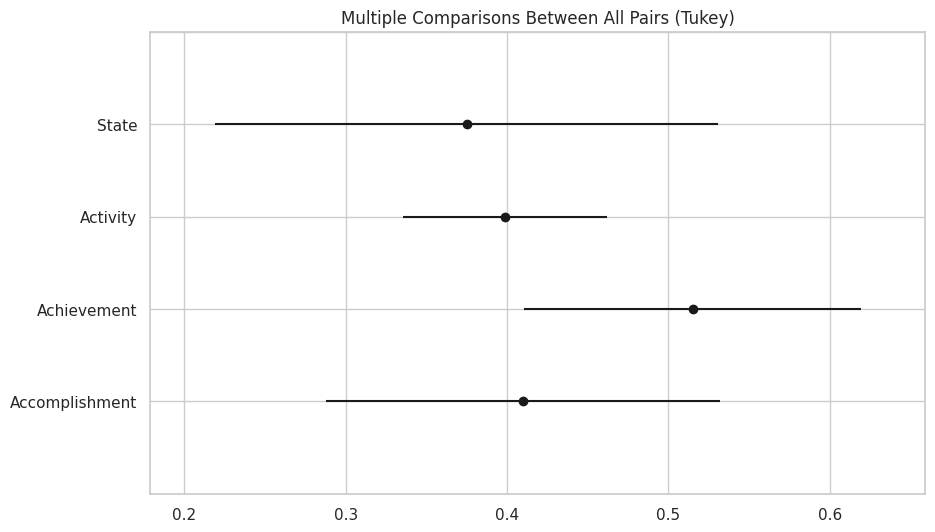

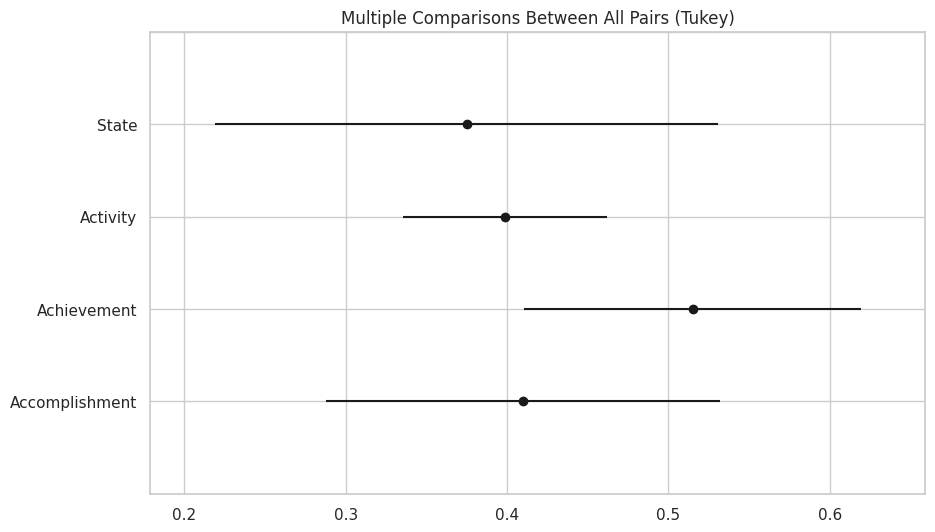

In [14]:
#faccio il test di Tukey per vedere la differenza tra tipi azionali

#stampo la tabella anova
anova_model = sm.formula.ols('Similarity_imp ~ Tipo_azionale', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("Tabella ANOVA:")
print(anova_table)

#eseguo il test di Tukey
tukey_results = pairwise_tukeyhsd(df['Similarity_imp'], df['Tipo_azionale'])
print("\nRisultati del test di Tukey:")
print(tukey_results)

#visualizzo i risultati
tukey_results.plot_simultaneous()